In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = '../data/original_data/dataset.csv'
df = pd.read_csv(dataset_path)

# Removing Empty Column
df.drop(columns='Unnamed: 32',inplace=True)

# Display the first few rows of the dataset
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [2]:
# Names, Datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
# Count the missing values per column
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [4]:
# Check for double entries and remove them if necessary!
df.duplicated().sum()

0

In [5]:
# Display summary statistics
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

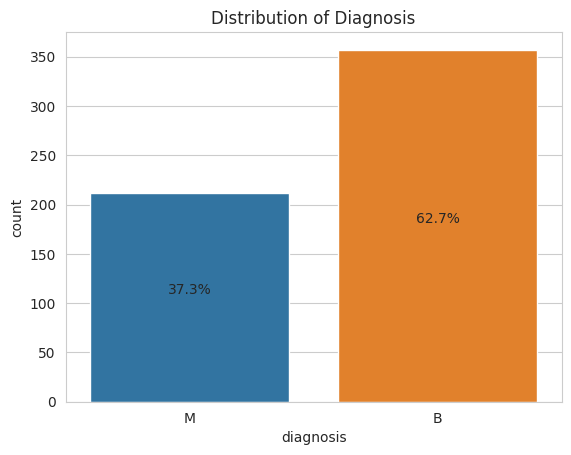

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentage of each class
class_len = len(df['diagnosis'])

# Visualize the distribution of the target variable (diagnosis) with percentages
sns.set_style('whitegrid')
ax = sns.countplot(x='diagnosis', data=df, palette='tab10', hue='diagnosis', legend=False)

# Display percentages on top of bars
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2
    percent = round(count / class_len,3) * 100
    ax.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

plt.title('Distribution of Diagnosis')
plt.savefig('../docs/eda_diagnosis_distribution.png')
plt.show()


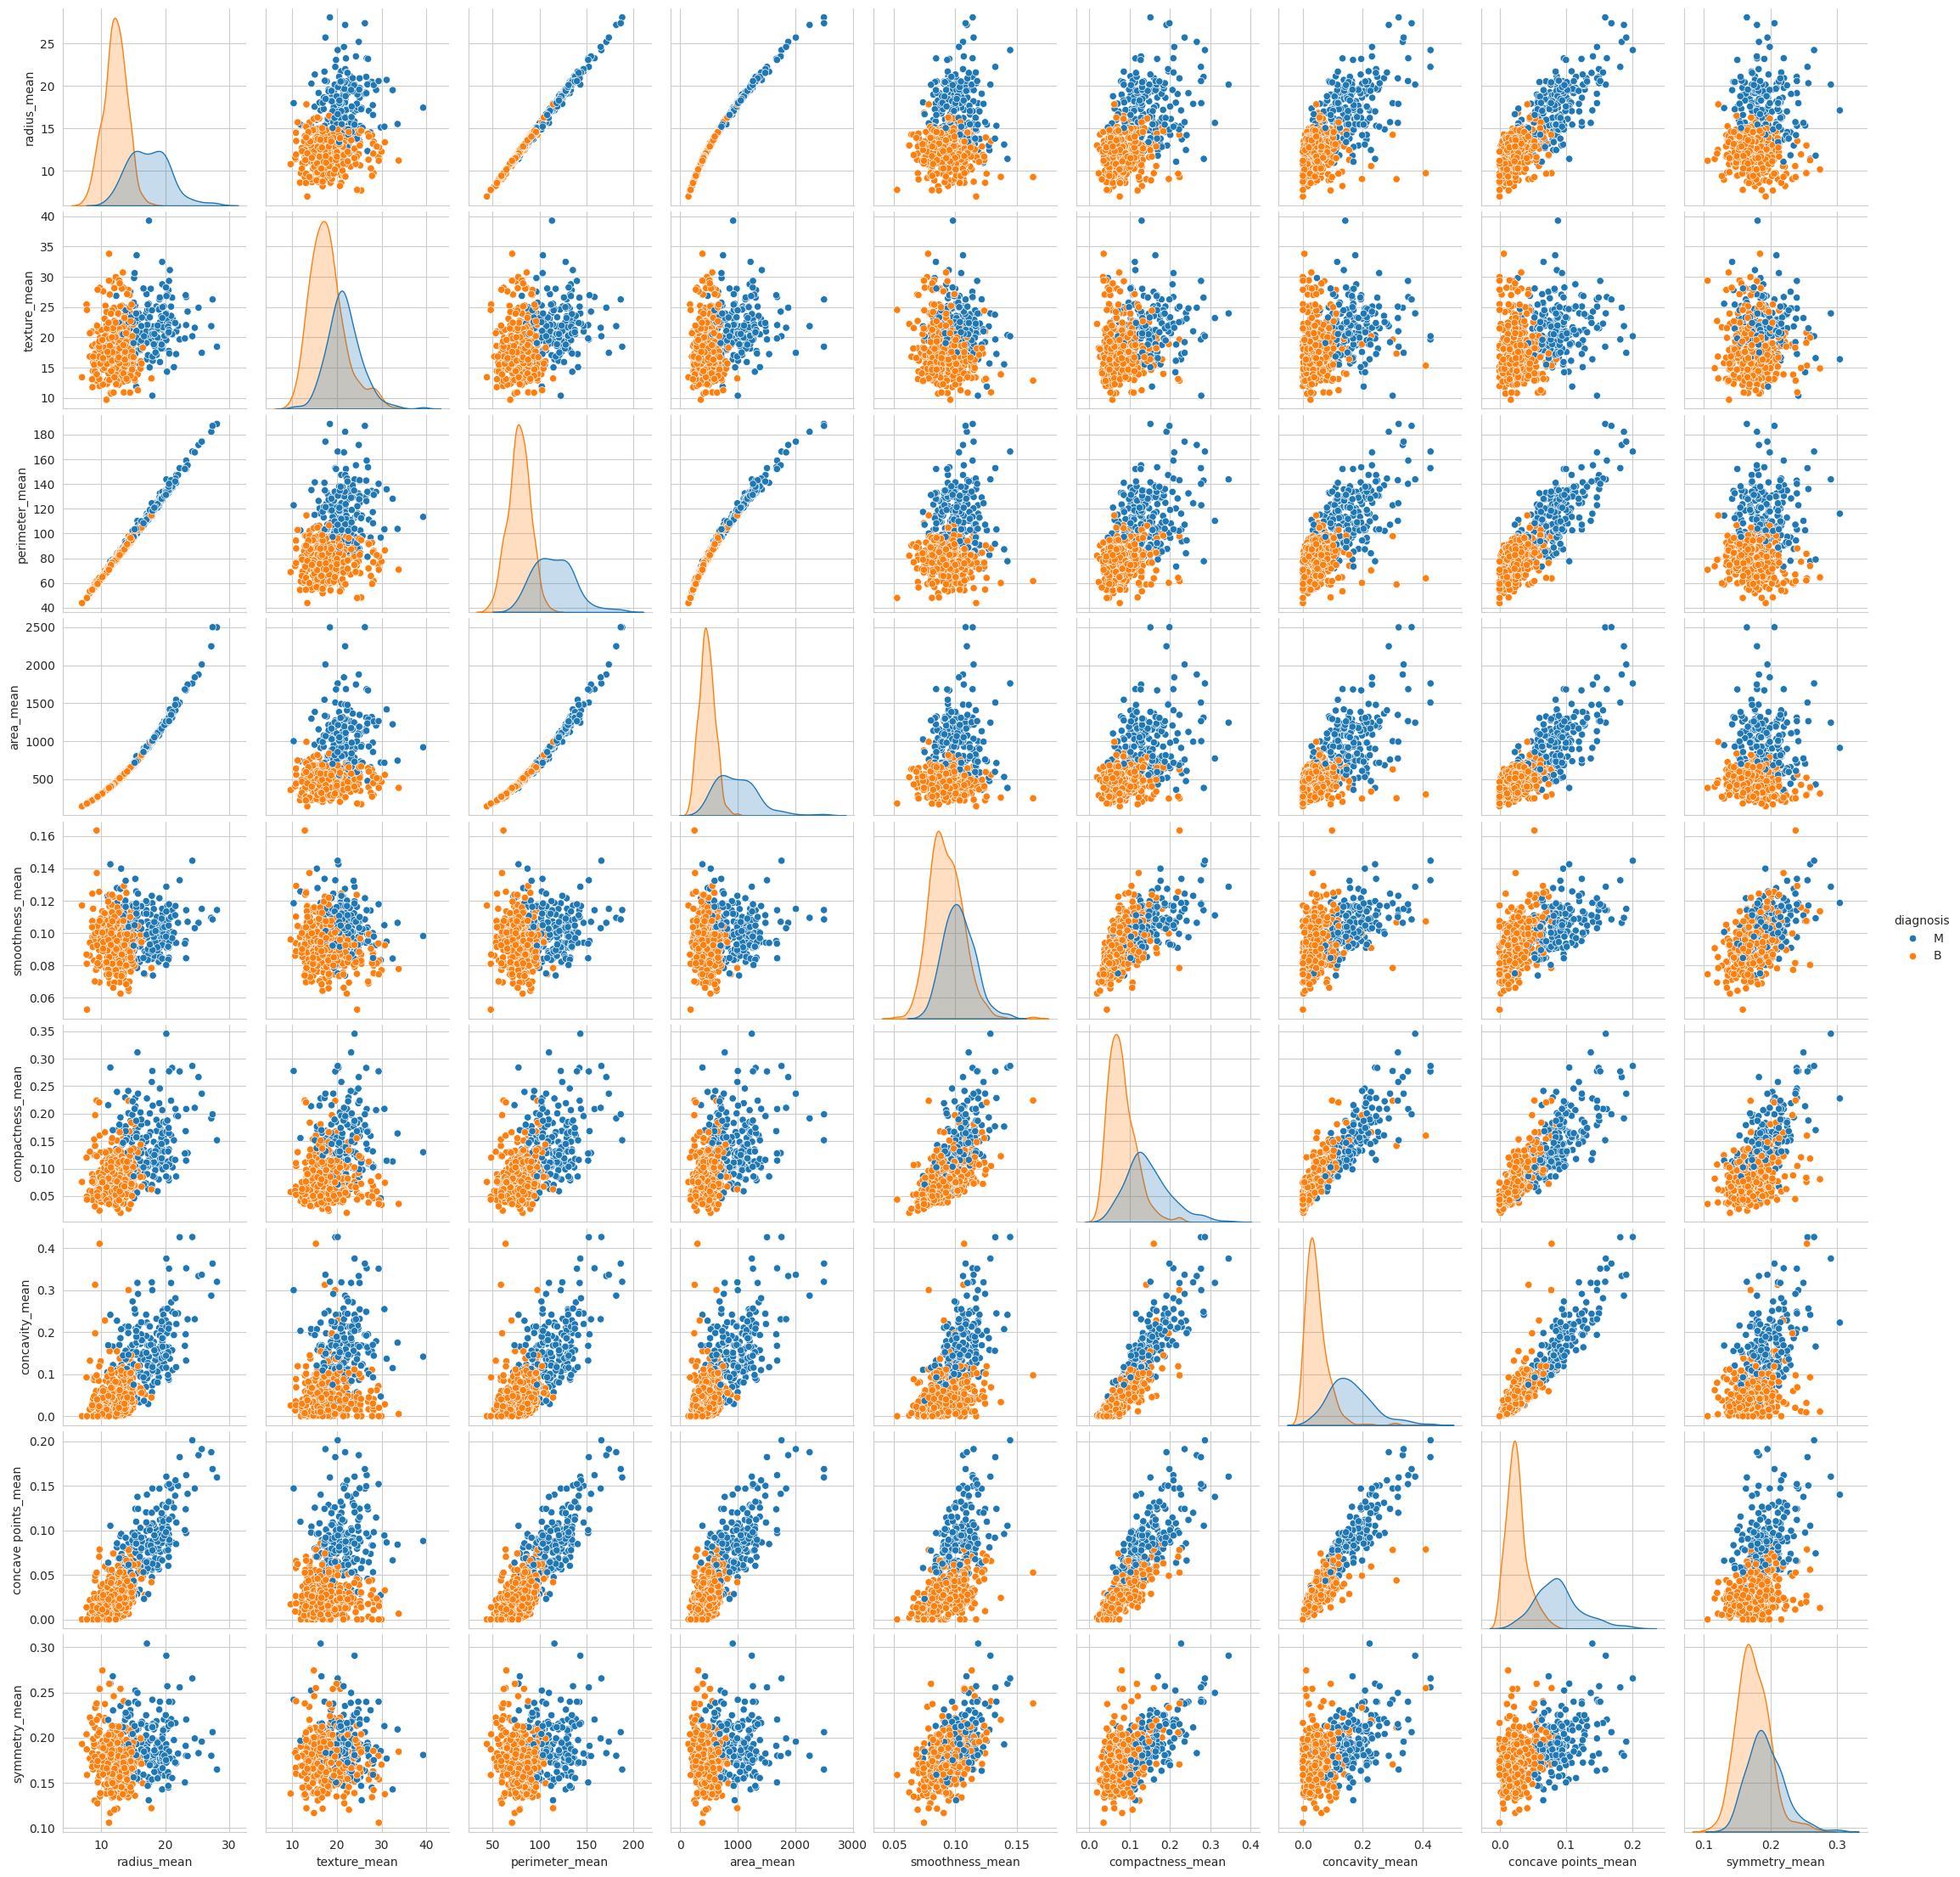

In [7]:
# Visualize relationships between features and the target variable
sns.pairplot(df, hue='diagnosis', vars=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean'])
plt.savefig('../docs/eda_pairplot_mean.png')
plt.show()

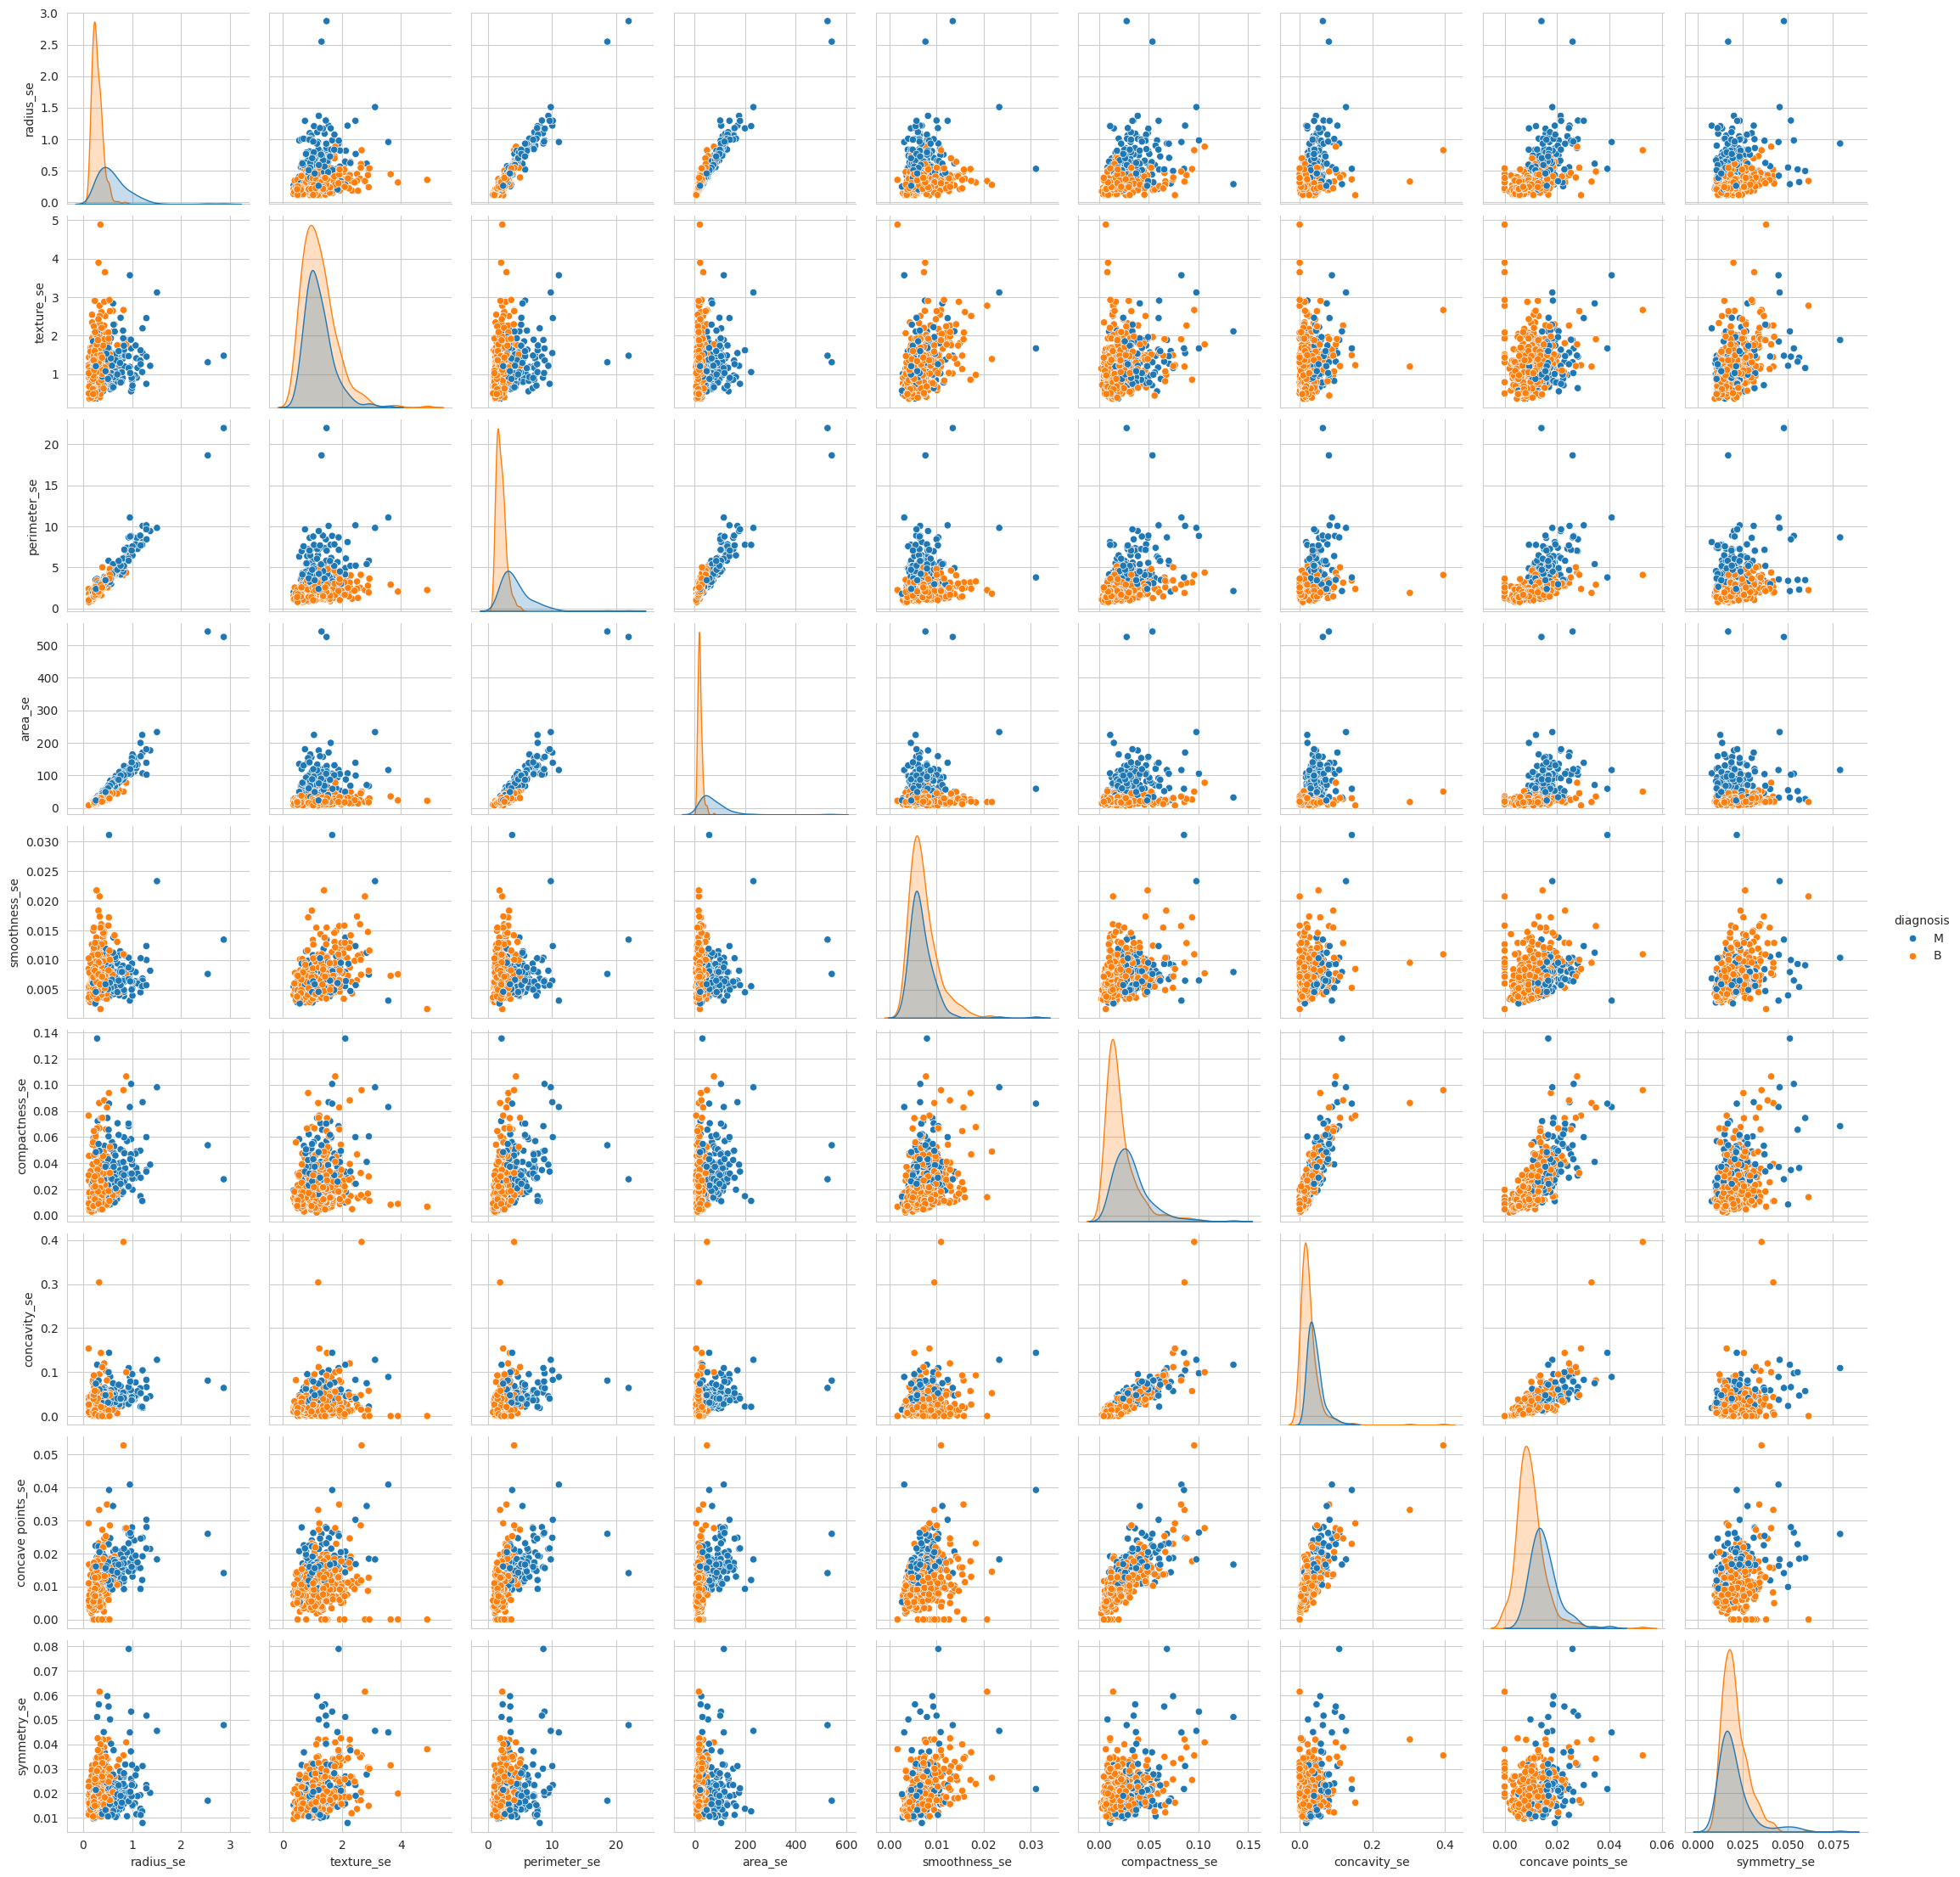

In [8]:
# Visualize relationships between features and the target variable
sns.pairplot(df, hue='diagnosis', vars=['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se'])
plt.savefig('../docs/eda_pairplot_se.png')
plt.show()

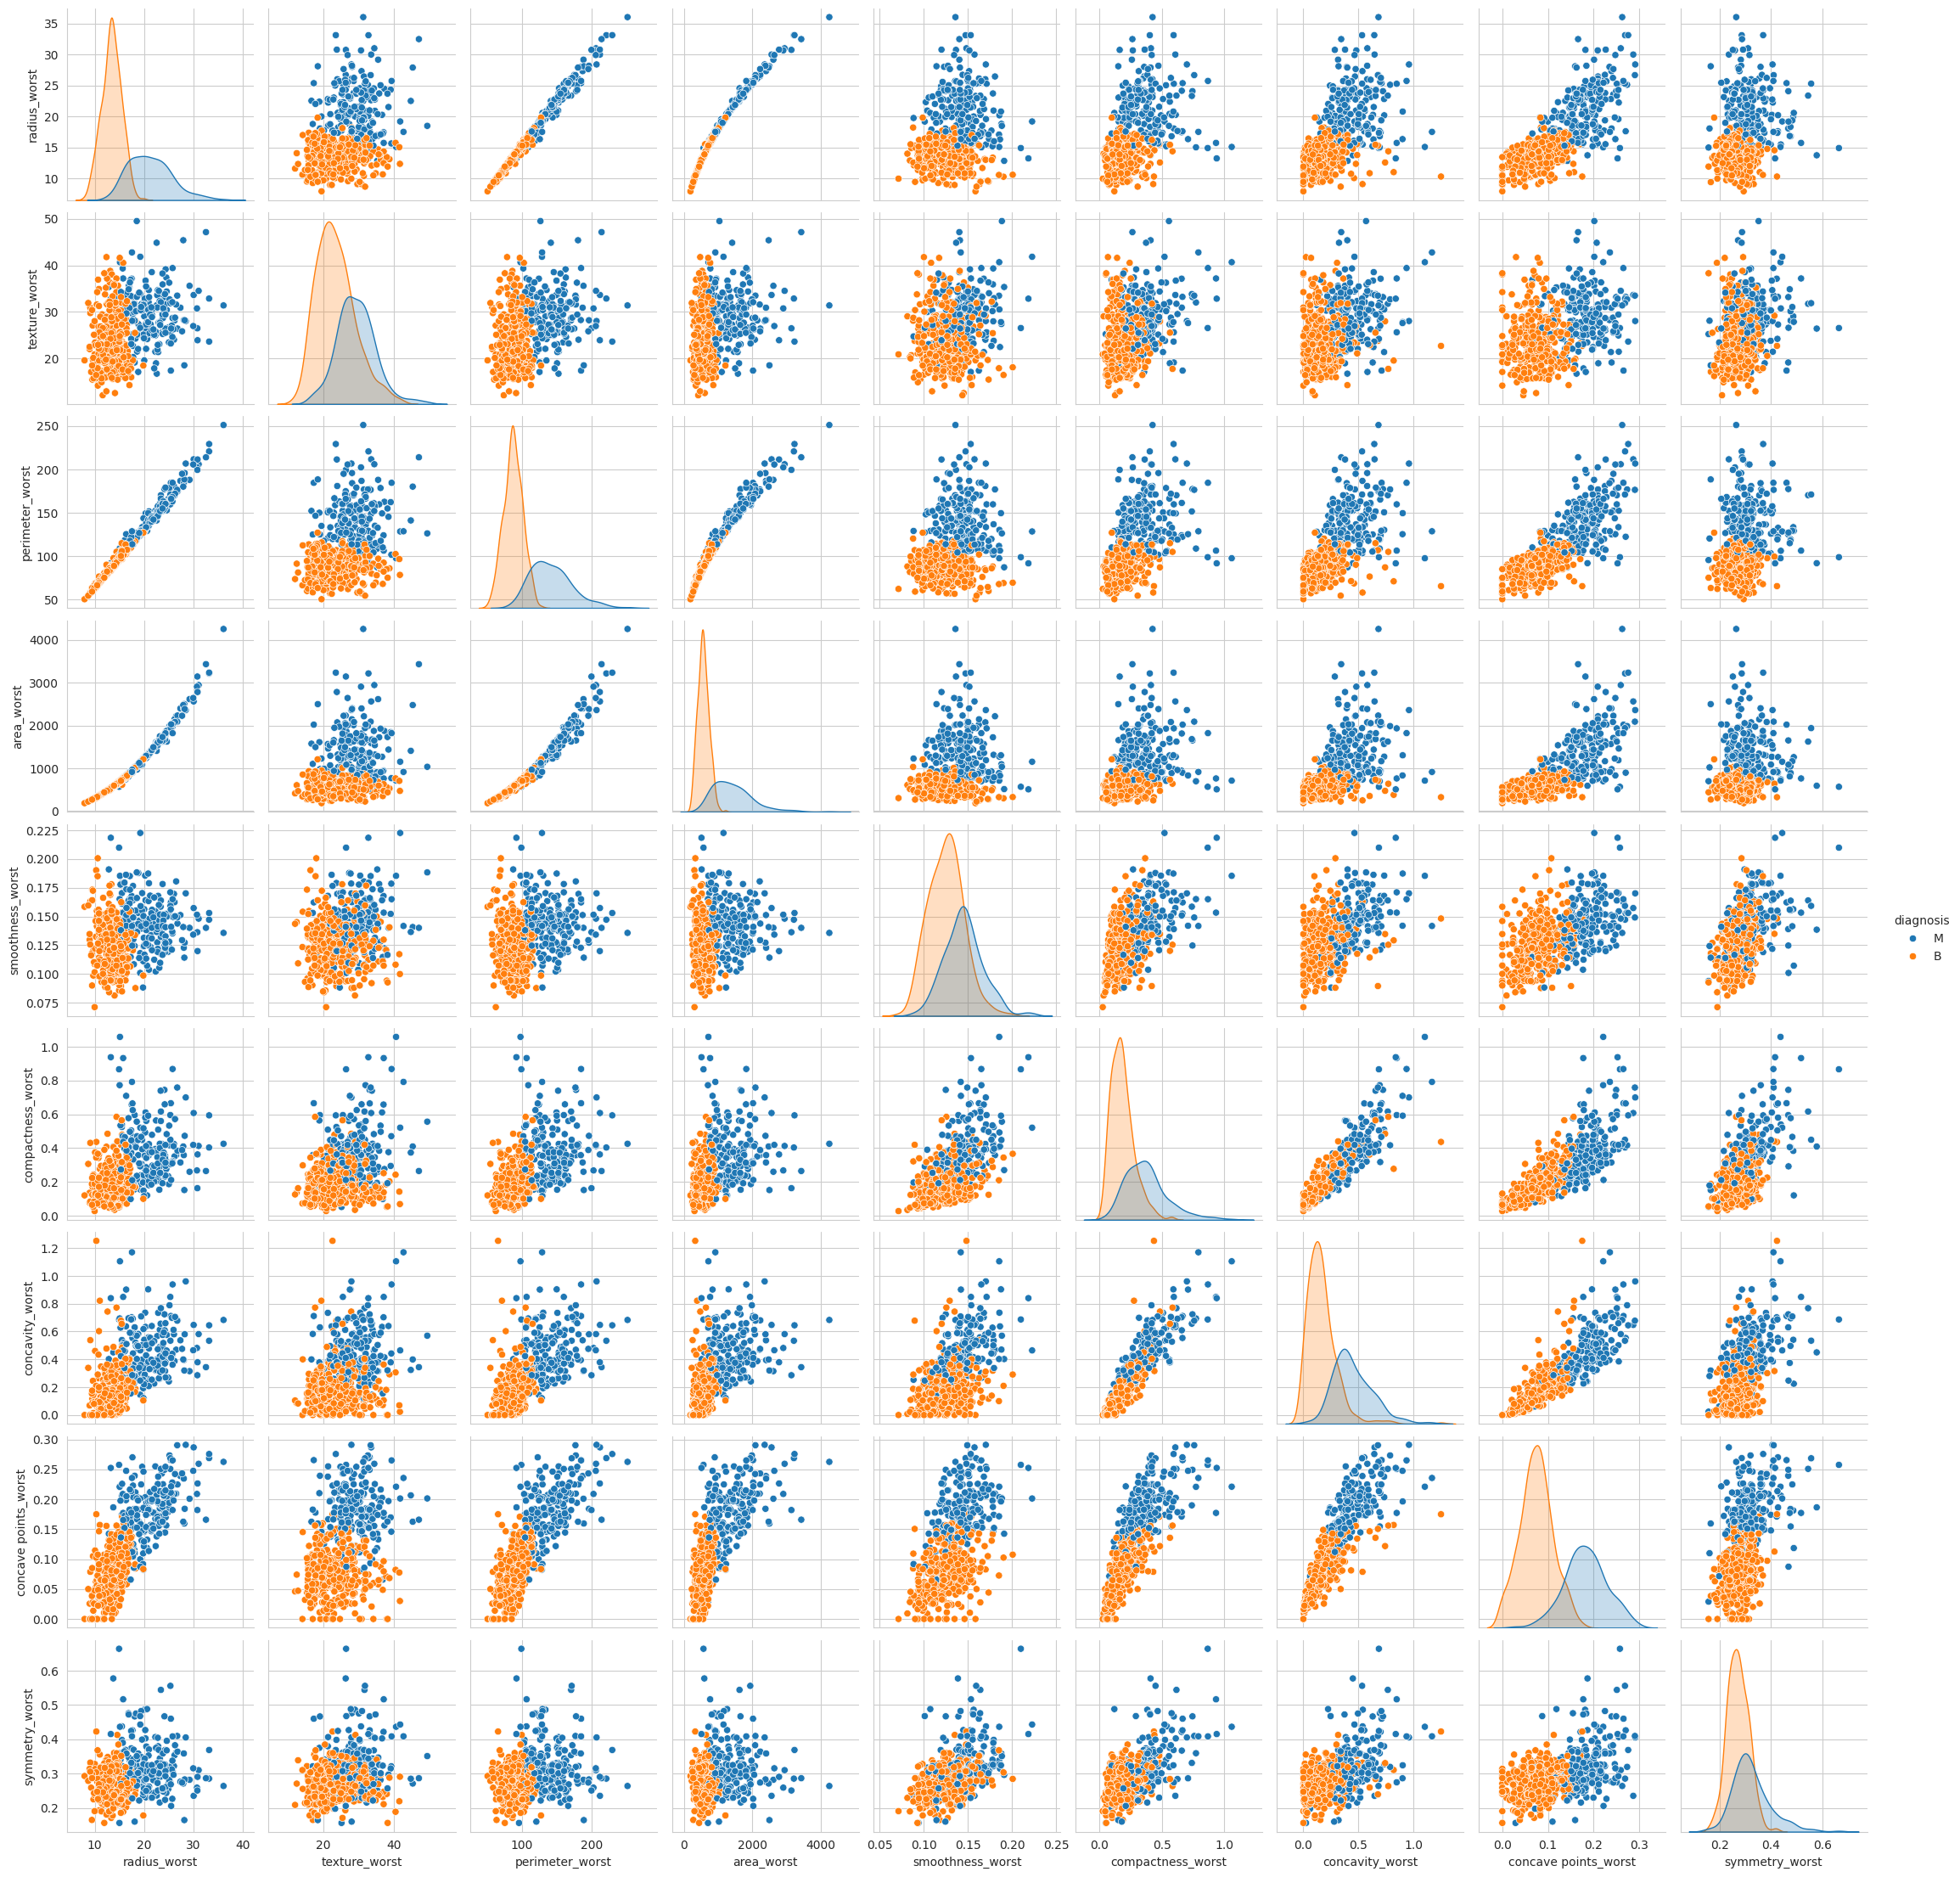

In [9]:
# Visualize relationships between features and the target variable
sns.pairplot(df, hue='diagnosis', vars=['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst'])
plt.savefig('../docs/eda_pairplot_worst.png')
plt.show()

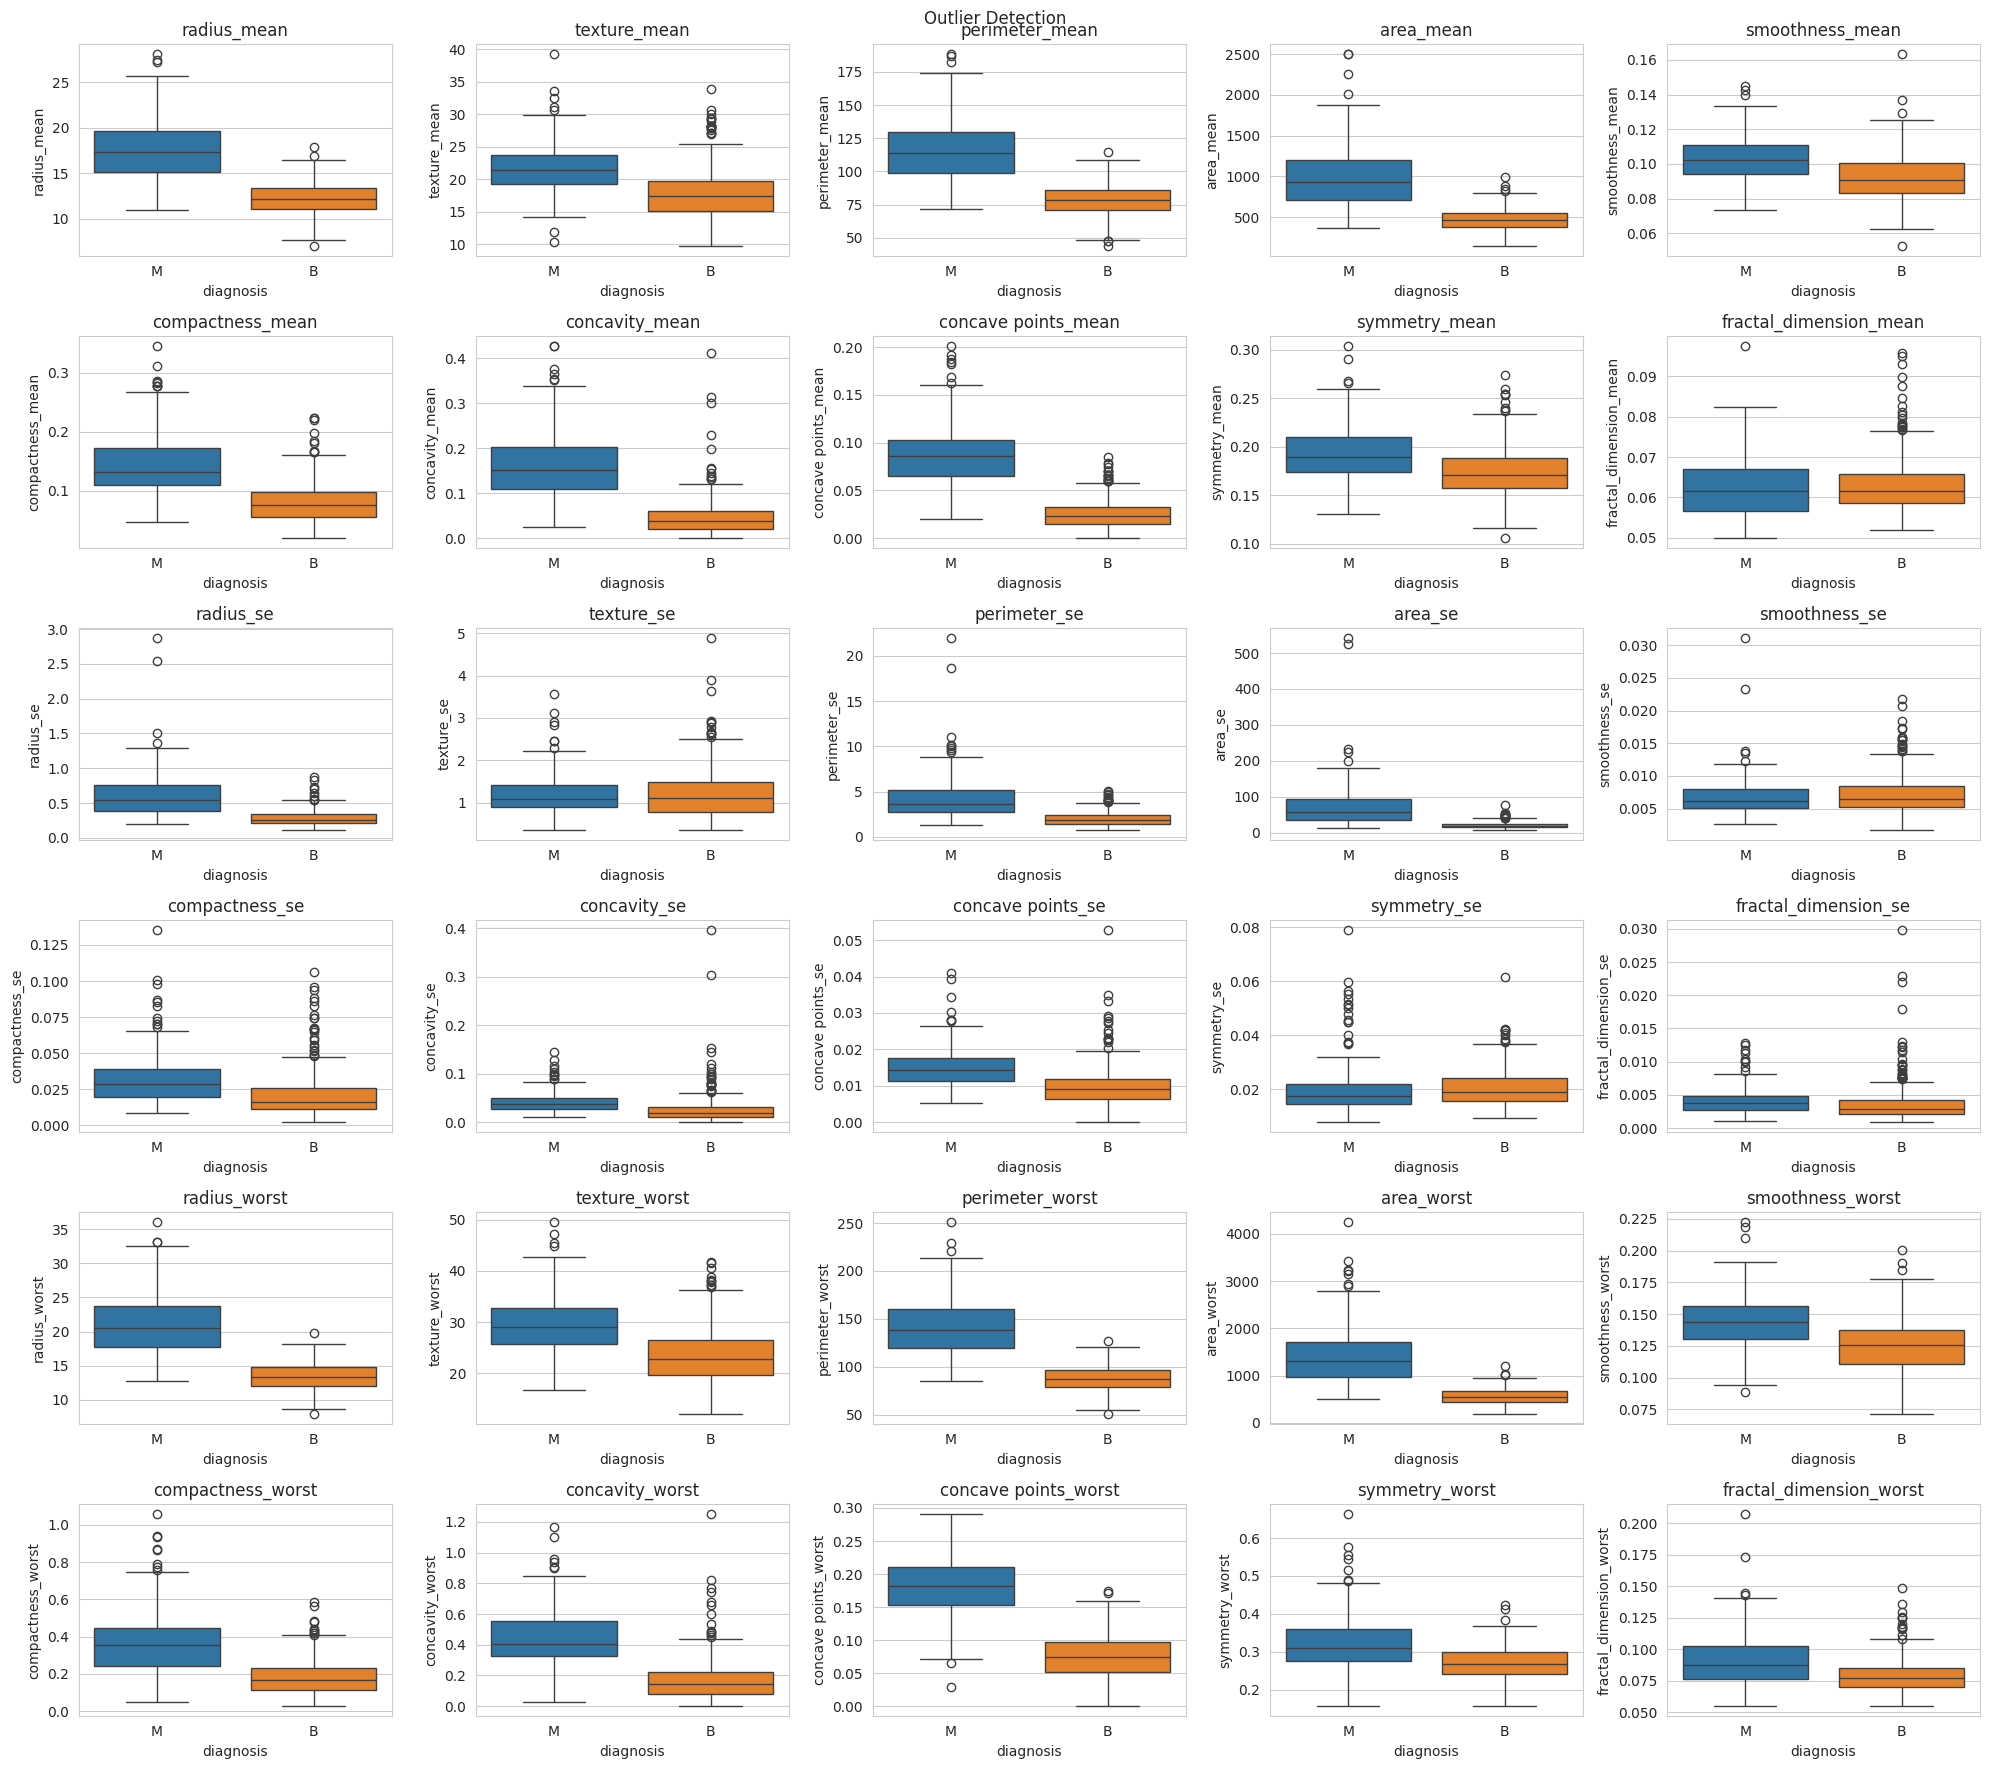

In [10]:
# Select numerical features
numerical_features = df.select_dtypes(include=['float64']).columns
n_cols = 5

# Calculate the number of rows needed for the subplots
num_rows = len(numerical_features) // n_cols + (len(numerical_features) % n_cols > 0)

# Set up subplots with 4 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=n_cols, figsize=(20, 3 * num_rows))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Iterate through numerical features and create box plots
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='diagnosis', y=feature, data=df, ax=axes[i],hue='diagnosis')
    axes[i].set_title(f'{feature}')

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Outlier Detection')
# Adjust layout
plt.tight_layout()
plt.savefig('../docs/eda_boxplots.png')
plt.show()

In [11]:
X = df.iloc[:, 2:]
y = df['diagnosis']

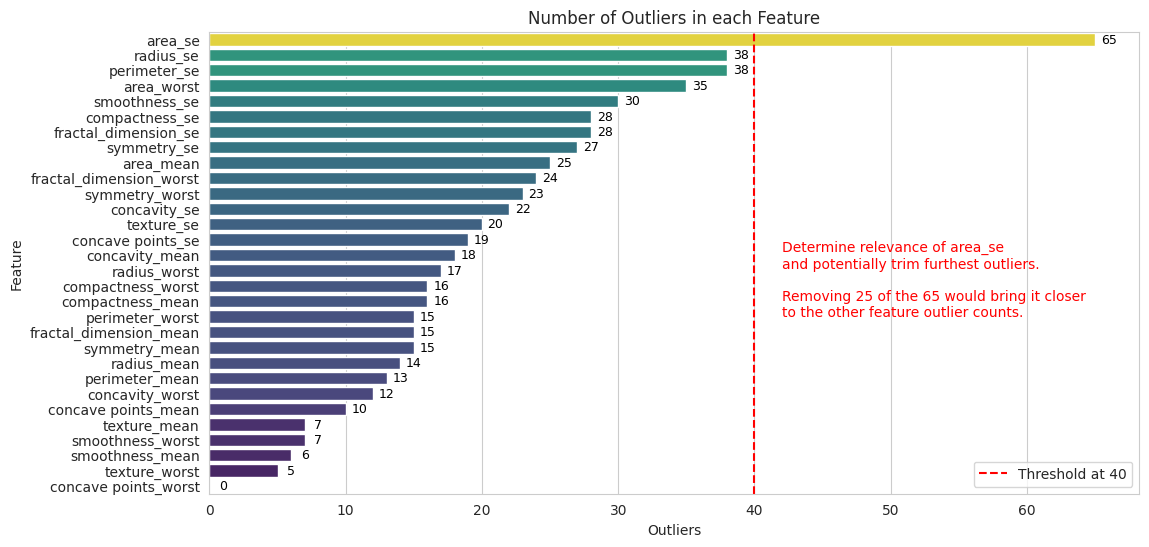

In [12]:
# Lets count the amount of outliers that fall outside the 1.5 * IQR range

# Handling outliers (example: using IQR method)
# Q1 = df['radius_mean'].quantile(0.25)
# Q3 = df['radius_mean'].quantile(0.75)
# IQR = Q3 - Q1
# df_no_outliers = df[(df['radius_mean'] >= Q1 - 1.5 * IQR) & (df['radius_mean'] <= Q3 + 1.5 * IQR)]

outliers_count = {}

for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = X[(X[col] < Q1 - 1.5 * IQR) | (X[col] > Q3 + 1.5 * IQR)]
    outliers_count[col] = len(outliers)

# Create a DataFrame from the dictionary for easier plotting
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Feature', 'Outliers'])

# Sort the DataFrame by the number of outliers in descending order
outliers_df = outliers_df.sort_values(by='Outliers', ascending=False)

# Create a countplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Outliers', y='Feature', data=outliers_df, palette='viridis', hue='Outliers', legend=False)

# Add annotations inside the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(width)}', (x + width + 1, y + height/2), ha='center', va='center', color='black', fontsize=9)

plt.axvline(x=40, color='red', linestyle='--', label='Threshold at 40')
plt.text(42, 18, 'Determine relevance of area_se \nand potentially trim furthest outliers. \n\nRemoving 25 of the 65 would bring it closer \nto the other feature outlier counts.', color='red', fontsize=10)
plt.legend()
plt.title('Number of Outliers in each Feature')
plt.savefig('../docs/eda_outliers.png')
plt.show()

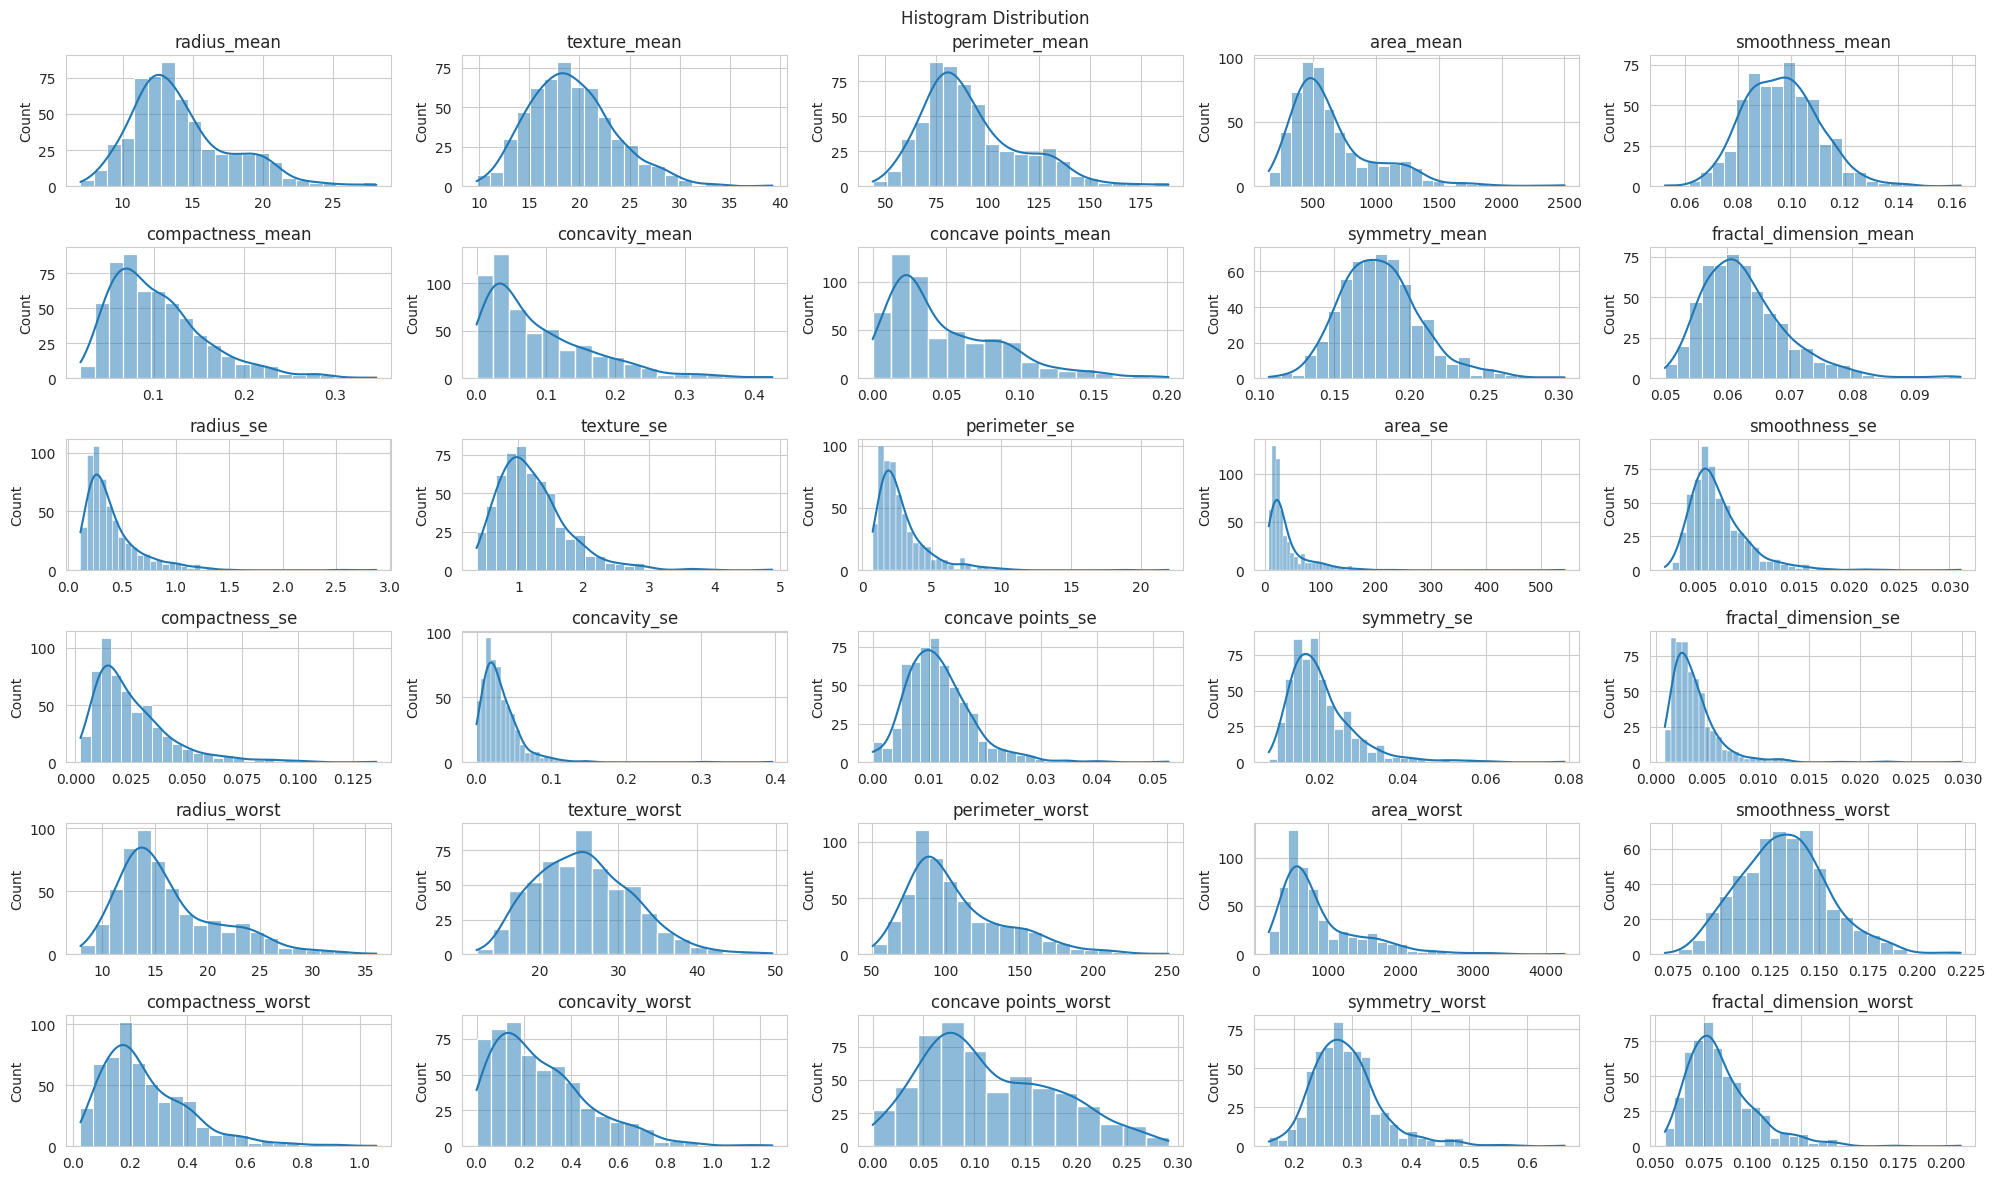

In [13]:
# Select numerical features
numerical_features = df.select_dtypes(include=['float64']).columns
n_cols = 5

# Calculate the number of rows needed for the subplots
num_rows = len(numerical_features) // n_cols + (len(numerical_features) % n_cols > 0)

# Set up subplots with 4 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=n_cols, figsize=(20, 2 * num_rows))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Iterate through numerical features and create box plots
for i, feature in enumerate(numerical_features):
    sns.histplot(x=feature, data=df, ax=axes[i],kde=True)
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('')

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Histogram Distribution')
# Adjust layout
plt.tight_layout()
plt.savefig('../docs/eda_histplot_kde.png')
plt.show()

In [14]:
# Calculating the means per diagnosis group, excluding id
df.groupby('diagnosis').mean().iloc[:,1:]

radius_mean  texture_mean  perimeter_mean   area_mean  \
diagnosis                                                          
B            12.146524     17.914762       78.075406  462.790196   
M            17.462830     21.604906      115.365377  978.376415   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
B                 0.092478          0.080085        0.046058   
M                 0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
diagnosis                                                              ...   
B                     0.025717       0.174186                0.062867  ...   
M                     0.087990       0.192909                0.062680  ...   

           radius_worst  texture_worst  perimeter_worst   area_worst  \
diagnosis                                                              
B             13.379801      23.515070        87.005938   558.899440   
M             21.134811      29.318208       141.370330  1422.286321   

           smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                         
B                  0.124959           0.182673         0.166238   
M                  0.144845           0.374824         0.450606   

           concave points_worst  symmetry_worst  fractal_dimension_worst  
diagnosis                                                                 
B                      0.074444        0.270246                 0.079442  
M                      0.182237        0.323468                 0.091530  

[2 rows x 30 columns]

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract features (X) from your dataset
X = df.drop(['id','diagnosis'], axis=1)  # 'diagnosis' is the target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=30)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Now X_pca contains the principal components

In [16]:
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
principal_components = pca.components_
noise_variance = pca.noise_variance_

print(f'Noise Variance: {noise_variance}\n')

for i in range(0,30):
    print(f'Top {i+1} Principal Components explain {cumulative_explained_variance[i]}%')

top_pca = principal_components[:15]

print('The top 15 Principal Components Explain 98.39% of all the variance')

Noise Variance: 0.0

Top 1 Principal Components explain 0.4427202560752633%
Top 2 Principal Components explain 0.6324320765155943%
Top 3 Principal Components explain 0.7263637090899081%
Top 4 Principal Components explain 0.7923850582446097%
Top 5 Principal Components explain 0.8473427431680723%
Top 6 Principal Components explain 0.8875879635669057%
Top 7 Principal Components explain 0.9100953006967308%
Top 8 Principal Components explain 0.9259825386969441%
Top 9 Principal Components explain 0.9398790324425352%
Top 10 Principal Components explain 0.9515688143366667%
Top 11 Principal Components explain 0.961366004212647%
Top 12 Principal Components explain 0.9700713832200258%
Top 13 Principal Components explain 0.9781166330919931%
Top 14 Principal Components explain 0.9833502905469195%
Top 15 Principal Components explain 0.9864881227145469%
Top 16 Principal Components explain 0.9891502160796992%
Top 17 Principal Components explain 0.9911301840050235%
Top 18 Principal Components explain 0

In [17]:
# top_pca has to be Transposed to be suitable for KMeans clustering
print(top_pca.shape)

(15, 30)


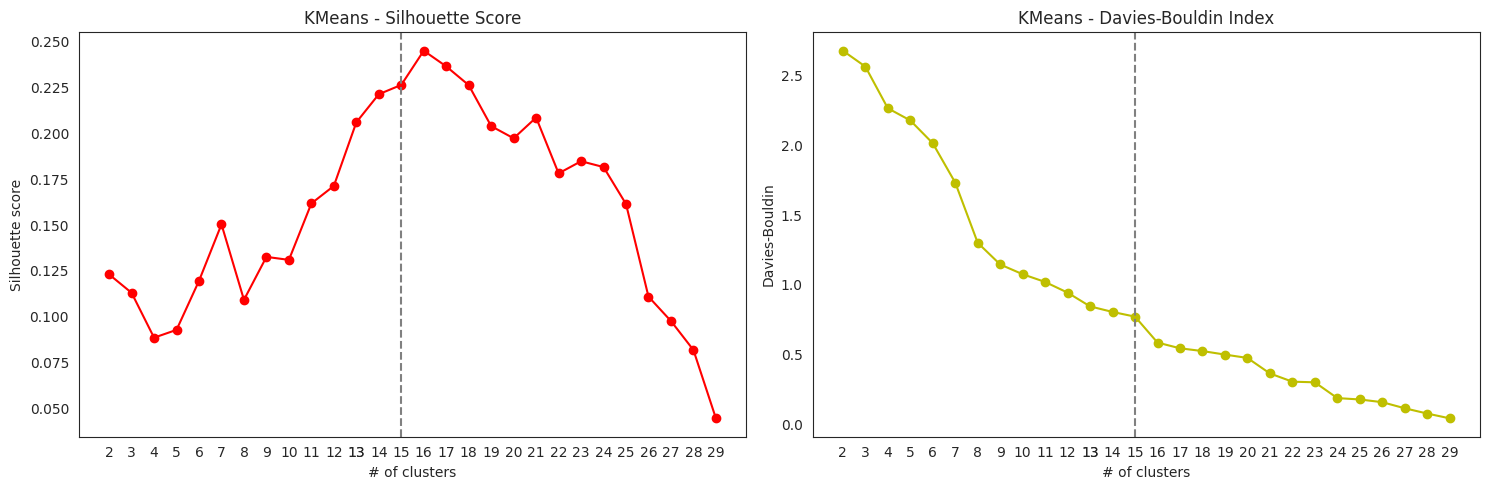

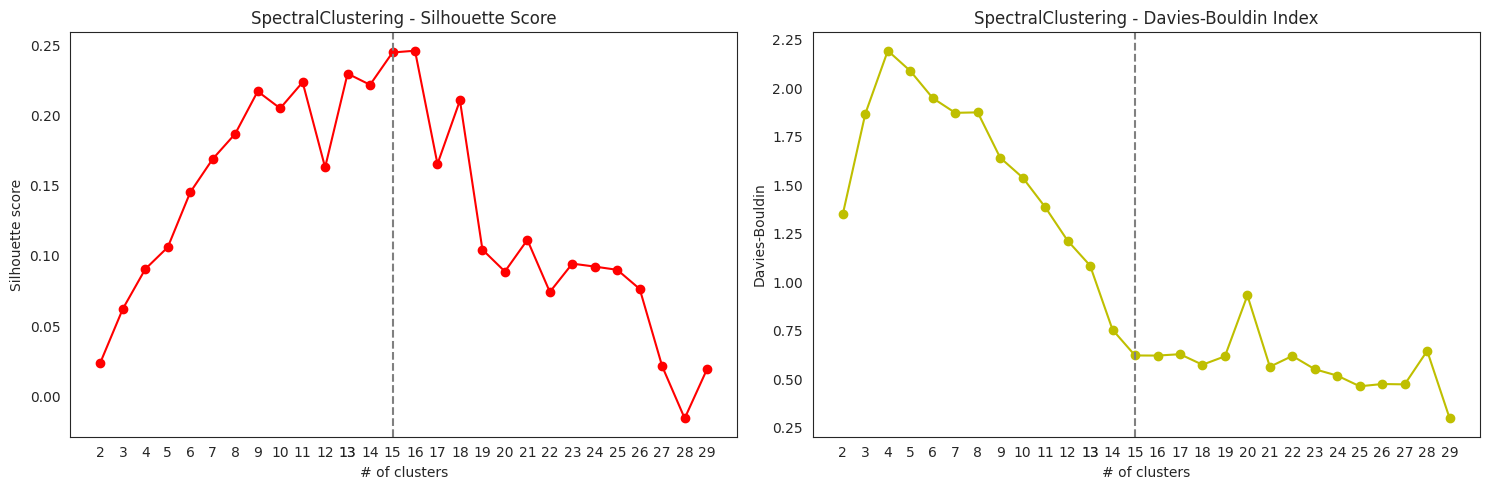

In [24]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

def find_optimal_cluster_count(data, limit, repeat=5, algorithms=None):
    if algorithms is None:
        algorithms = {
            'KMeans': KMeans,
            'SpectralClustering': SpectralClustering,
        }

    pca_data_sample = data[np.random.choice(data.shape[0], int(1 * data.shape[0]), replace=False)]

    results = {alg_name: {'silhouette': {}, 'davies': {}} for alg_name in algorithms}

    for alg_name, algorithm in algorithms.items():
        for _ in range(repeat):
            silhoutete = {}
            davies_bouldin = {}

            for k in range(2, limit):
                if alg_name == 'SpectralClustering':
                    model = algorithm(n_clusters=k, random_state=100).fit(pca_data_sample)
                    clusters = model.labels_
                else:
                    model = algorithm(n_clusters=k, random_state=100).fit(pca_data_sample)
                    clusters = model.labels_

                silhoutete[k] = silhouette_score(pca_data_sample, clusters) + silhoutete.get(k, 0)
                davies_bouldin[k] = davies_bouldin_score(pca_data_sample, clusters) + davies_bouldin.get(k, 0)

            for k in range(2, limit):
                results[alg_name]['silhouette'][k] = (silhoutete[k] / repeat) + results[alg_name]['silhouette'].get(k, 0)
                results[alg_name]['davies'][k] = (davies_bouldin[k] / repeat) + results[alg_name]['davies'].get(k, 0)

    return results

# Call the function to check clustering for the top_pca found principal components!
results = find_optimal_cluster_count(top_pca.T, 30, 100)

# Plot results for each algorithm
for alg_name, result in results.items():
    plt.figure(figsize=(15, 5))

    # Plot Silhouette Score
    plt.subplot(1, 2, 1)
    plt.plot(list(result['silhouette'].keys()), list(result['silhouette'].values()), marker='o', linestyle='-', color='r')
    plt.xlabel("# of clusters")
    plt.ylabel("Silhouette score")
    plt.axvline(x=15, color='grey', linestyle='--', label='Selected Clusters')
    plt.title(f"{alg_name} - Silhouette Score")
    plt.xticks(list(result['silhouette'].keys()) + [13])

    # Plot Davies-Bouldin Index
    plt.subplot(1, 2, 2)
    plt.plot(list(result['davies'].keys()), list(result['davies'].values()), marker='o', linestyle='-', color='y')
    plt.xlabel("# of clusters")
    plt.ylabel("Davies-Bouldin")
    plt.axvline(x=15, color='grey', linestyle='--', label='Selected Clusters')
    plt.title(f"{alg_name} - Davies-Bouldin Index")
    plt.xticks(list(result['davies'].keys()) + [13])

    plt.tight_layout()
    plt.savefig(f'../docs/eda_optimal_cluster_{alg_name}.png')
    plt.show()


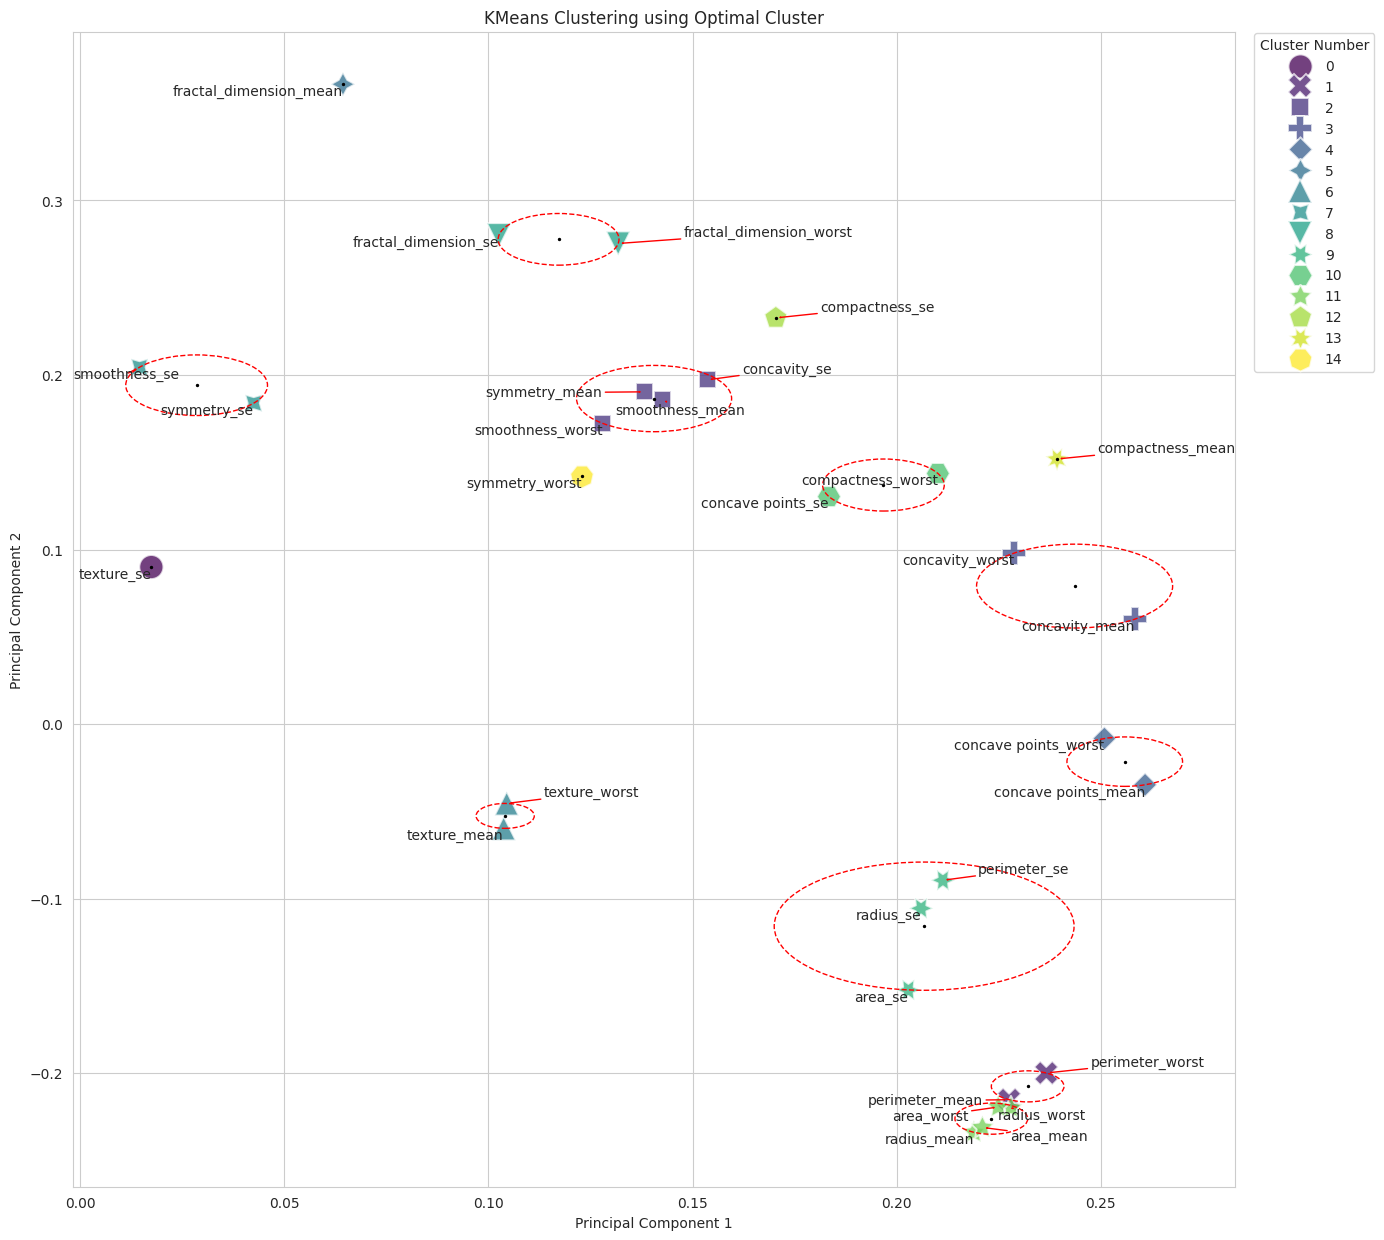

PC1       PC2  clusters                  feature  \
9   0.064363  0.366575         5   fractal_dimension_mean   
15  0.170393  0.232716        12           compactness_se   
5   0.239285  0.151892        13         compactness_mean   
28  0.122905  0.141883        14           symmetry_worst   
11  0.017428  0.089980         0               texture_se   
4   0.142590  0.186113         2          smoothness_mean   
8   0.138167  0.190349         2            symmetry_mean   
3   0.220995 -0.231077        11                area_mean   
23  0.224871 -0.219352        11               area_worst   
21  0.104469 -0.045467         6            texture_worst   
1   0.103725 -0.059706         6             texture_mean   
20  0.227997 -0.219866        11             radius_worst   
22  0.236640 -0.199878         1          perimeter_worst   
2   0.227537 -0.215181         1           perimeter_mean   
0   0.218902 -0.233857        11              radius_mean   
10  0.205979 -0.105552         9                radius_se   
27  0.250886 -0.008257         4     concave points_worst   
7   0.260854 -0.034768         4      concave points_mean   
19  0.102568  0.280092         8     fractal_dimension_se   
29  0.131784  0.275339         8  fractal_dimension_worst   
17  0.183417  0.130322        10        concave points_se   
25  0.210096  0.143593        10        compactness_worst   
16  0.153590  0.197207         2             concavity_se   
14  0.014531  0.204430         7            smoothness_se   
18  0.042498  0.183848         7              symmetry_se   
24  0.127953  0.172304         2         smoothness_worst   
6   0.258400  0.060165         3           concavity_mean   
26  0.228768  0.097964         3          concavity_worst   
12  0.211326 -0.089457         9             perimeter_se   
13  0.202870 -0.152293         9                  area_se   

                                 cluster_center  distance_to_center  
9     [0.06436334637177445, 0.3665754713782565]        0.000000e+00  
15   [0.17039345120745902, 0.23271589619008098]        0.000000e+00  
5    [0.23928535395300088, 0.15189161007332508]        0.000000e+00  
28   [0.12290455637796907, 0.14188334860203783]        0.000000e+00  
11  [0.017428028148950475, 0.08997968182917014]        1.040834e-17  
4    [0.14057475114913426, 0.18649335685144092]        2.050524e-03  
8    [0.14057475114913426, 0.18649335685144092]        4.545512e-03  
3   [0.22319114901315507, -0.22603802006346507]        5.496503e-03  
23  [0.22319114901315507, -0.22603802006346507]        6.893845e-03  
21   [0.1040969518364499, -0.05258669328080942]        7.129127e-03  
1    [0.1040969518364499, -0.05258669328080942]        7.129127e-03  
20  [0.22319114901315507, -0.22603802006346507]        7.821882e-03  
22   [0.2320884868736352, -0.20752989466888583]        8.902714e-03  
2    [0.2320884868736352, -0.20752989466888583]        8.902714e-03  
0   [0.22319114901315507, -0.22603802006346507]        8.918044e-03  
10  [0.20672477589071736, -0.11576733805075873]        1.024239e-02  
27  [0.2558698648018688, -0.021512367781646266]        1.416113e-02  
7   [0.2558698648018688, -0.021512367781646266]        1.416113e-02  
19   [0.11717613248676763, 0.27771574759648376]        1.479983e-02  
29   [0.11717613248676763, 0.27771574759648376]        1.479983e-02  
17    [0.19675663856097794, 0.1369573665896277]        1.489863e-02  
25    [0.19675663856097794, 0.1369573665896277]        1.489863e-02  
16   [0.14057475114913426, 0.18649335685144092]        1.685762e-02  
14  [0.028514936890438103, 0.19413922648738474]        1.736223e-02  
18  [0.028514936890438103, 0.19413922648738474]        1.736223e-02  
24   [0.14057475114913426, 0.18649335685144092]        1.899072e-02  
6    [0.24358400703189054, 0.07906473856721895]        2.401488e-02  
26   [0.24358400703189054, 0.07906473856721895]        2.401488e-02  
12  [0.20672477589071736, -0.11576733805075873]        2.670940e-02  
13  [0.2067247758

In [19]:
from sklearn.cluster import KMeans
from adjustText import adjust_text
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with PC1 and PC2 columns and use the optimal cluster count = 4
df_pca = pd.DataFrame({'PC1': pca.components_[0], 'PC2': pca.components_[1]})

# Optimal Number of clusters
n_clusters = 15

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_pca['clusters'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])
df_pca['feature'] = X.columns

# Add cluster centers to the DataFrame
cluster_centers = kmeans.cluster_centers_
df_pca['cluster_center'] = [cluster_centers[cluster] for cluster in df_pca['clusters']]

# Add distance to cluster center as a new column
df_pca['distance_to_center'] = np.linalg.norm(df_pca[['PC1', 'PC2']].values - df_pca['cluster_center'].tolist(), axis=1)

# Calculate maximum distance within each cluster
max_distances = df_pca.groupby('clusters')['distance_to_center'].max()

# Plotting with different shapes for clusters
plt.figure(figsize=(15, 15))
scatter = sns.scatterplot(x='PC1', y='PC2', s=300, hue='clusters', style='clusters', data=df_pca, palette='viridis', legend='full', alpha=0.75)
plt.title('KMeans Clustering using Optimal Cluster')
plt.suptitle('')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add feature names, cluster centers, and distances as text labels next to the cluster points
texts = []
for i in range(len(df_pca)):
    texts.append(plt.text(df_pca['PC1'][i], df_pca['PC2'][i], f"{df_pca['feature'][i]}", fontsize=10, alpha=1))

# Draw circles for each cluster using maximum distance as radius
for cluster, max_distance in max_distances.items():
    center = df_pca[df_pca['clusters'] == cluster]['cluster_center'].iloc[0]
    circle = plt.Circle(center, max_distance, edgecolor='red', facecolor='none', linestyle='dashed')
    plt.gca().add_patch(circle)

    # Add a black dot at the center
    plt.scatter(center[0], center[1], color='black', marker='o', s=2)

# Adjust text labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'), force_text=(0.3, 0.3))

# Show the legend with a custom title and prevent overlap
plt.legend(title='Cluster Number', bbox_to_anchor=(1.01, 1.005), loc='upper left', ncol=1)

plt.savefig(f'../docs/eda_pca_clusters.png')

plt.show()

# Display the updated DataFrame with cluster centers and distances
df_pca.sort_values(by=['distance_to_center','clusters'])


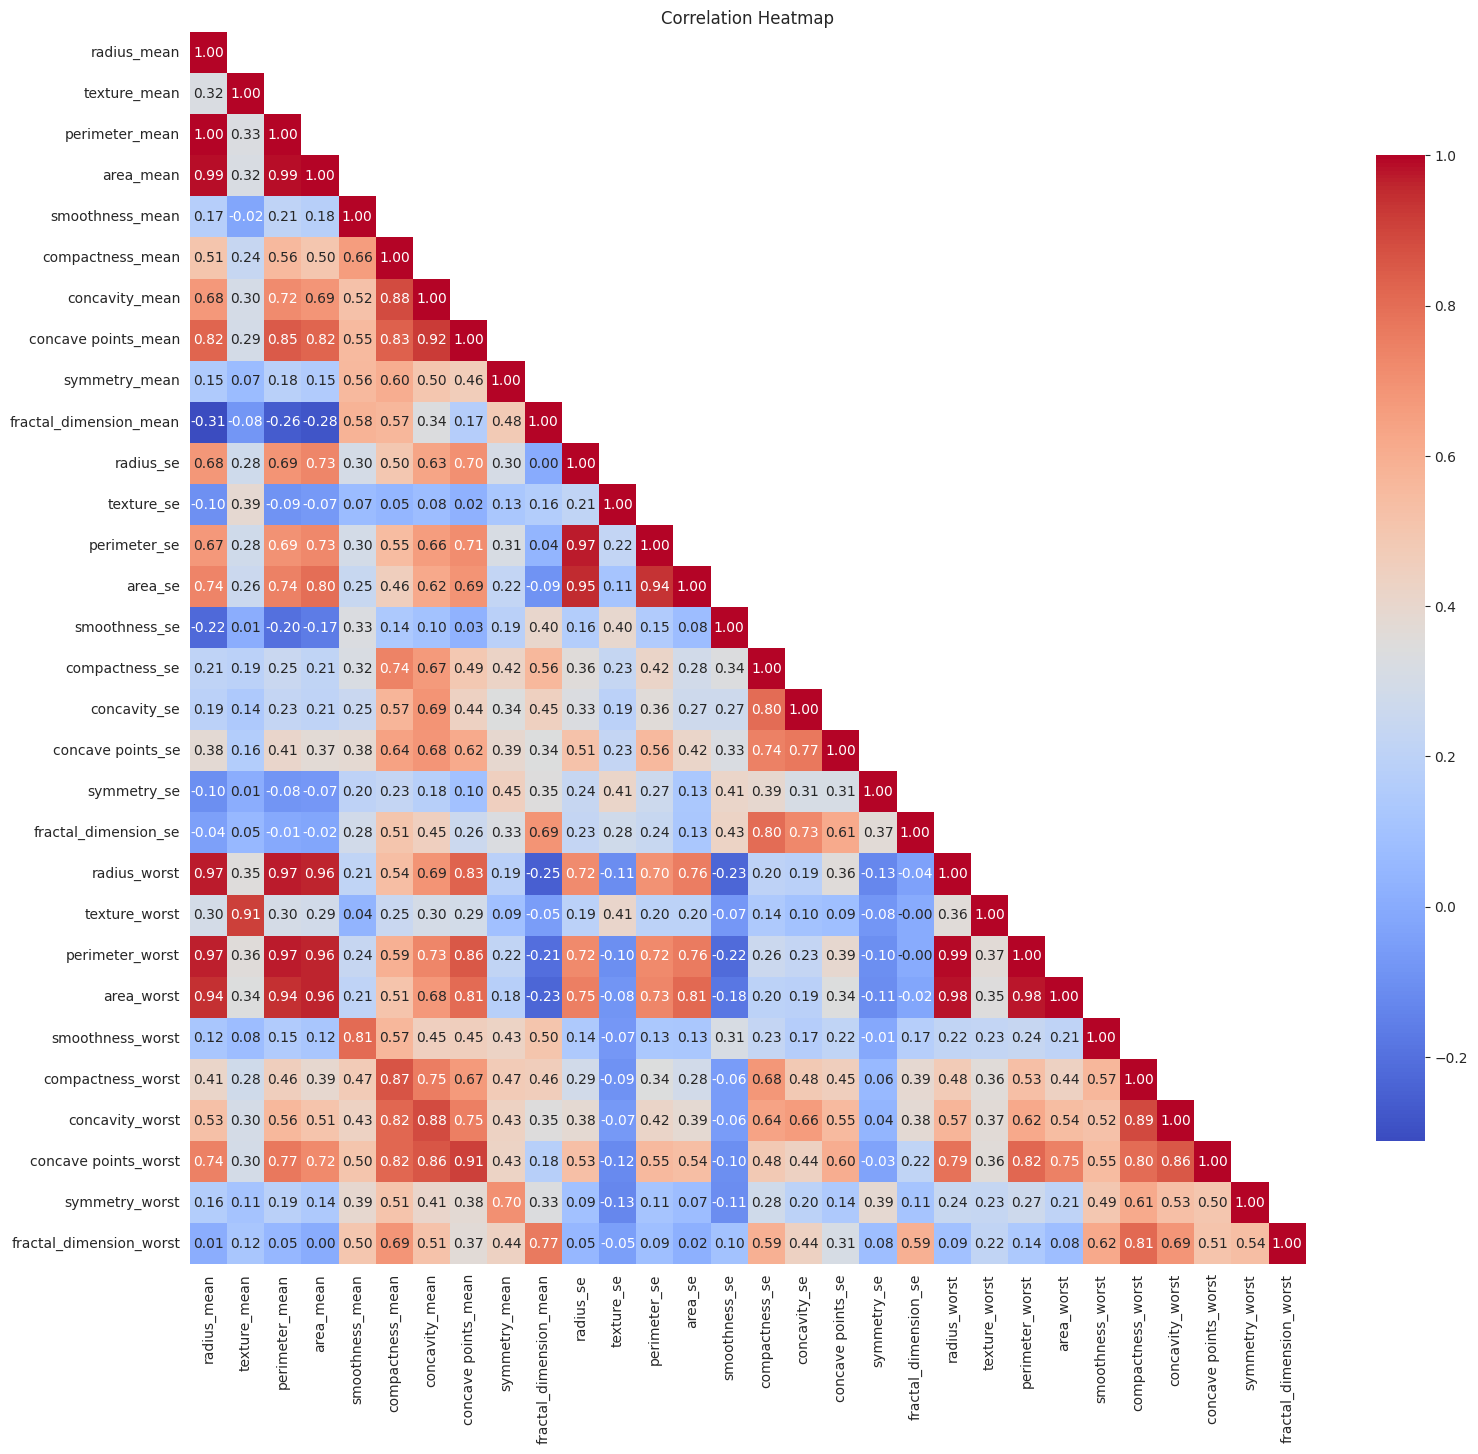

In [20]:
# The following tells us that from the 30 variables available, 15 groups can be formed that will explain more than 98% of the variance
# This means that from the features only 15 are really unique and contribute to significantly. Other feature might move very similar and don't contribute much.
# Let's explore this with a bivariate analysis!

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64']).columns

# Calculate correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)).T

# Set up the matplotlib figure
plt.figure(figsize=(18, 16))

sns.set_style('white')
# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=~mask, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap')
plt.savefig('../docs/eda_corr_heatmap.png')
plt.show()

In [21]:
from scipy.stats import f_oneway

# Declare X and y again
X = df.iloc[:, 2:]
y = df['diagnosis']

# Creating a normalized dataframe of the features
df_normalized = pd.DataFrame(X_scaled, columns=X.columns)

# Add the categorical variable to the normalized DataFrame
df_normalized['y'] = y

# Extract continuous variables
continuous_variables = df_normalized.columns[:-1]  # Exclude the categorical variable 'y'

# Perform ANOVA (Analysis of Variance) for each normalized continuous variable
anova_results = {}
for continuous_var in continuous_variables:
    groups = [df_normalized[continuous_var][df_normalized['y'] == category] for category in df_normalized['y'].unique()]
    f_statistic, p_value = f_oneway(*groups)
    anova_results[continuous_var] = {'F-statistic': f_statistic, 'p-value': p_value}

# Create a DataFrame with ANOVA results
anova_df = pd.DataFrame(anova_results).T

# The F-statistic in an ANOVA test is used to assess whether the means of different groups are equal. 
# A high F-statistic generally suggests that there is a significant difference in the means of at least two groups.

# The ANOVA test works by comparing the variance between group means to the variance within the groups. 
# The F-statistic is the ratio of these two variances. If the variance between group means is significantly larger than the variance within groups, 
# the F-statistic will be large, indicating that at least one group mean is significantly different from the others.

# In the context of feature selection or analysis, a high F-statistic for a particular variable in relation to the target variable can suggest that there is a significant difference in the means of that variable across different categories of the target variable. 
# It implies that the variable might be informative or relevant for predicting the target variable.

# However, it's important to interpret the F-statistic along with its associated p-value. A high F-statistic alone doesn't necessarily indicate significance; 
# the p-value tells you whether the observed F-statistic is statistically significant or if it could have occurred by random chance. 
# Lower p-values (typically below a chosen significance level, e.g., 0.05) suggest that the observed differences are unlikely due to random variation.



# Sort by p-value and then by F-statistic in descending order
sorted_anova_df = anova_df.sort_values(by=['p-value', 'F-statistic'], ascending=[True, False])
sorted_anova_df['p-value (Rounded)'] = sorted_anova_df['p-value'].round(5)

# Display the sorted DataFrame with the new columns
sorted_anova_df

F-statistic        p-value  p-value (Rounded)
concave points_worst      964.385393  1.969100e-124            0.00000
perimeter_worst           897.944219  5.771397e-119            0.00000
concave points_mean       861.676020  7.101150e-116            0.00000
radius_worst              860.781707  8.482292e-116            0.00000
perimeter_mean            697.235272  8.436251e-101            0.00000
area_worst                661.600206   2.828848e-97            0.00000
radius_mean               646.981021   8.465941e-96            0.00000
area_mean                 573.060747   4.734564e-88            0.00000
concavity_mean            533.793126   9.966556e-84            0.00000
concavity_worst           436.691939   2.464664e-72            0.00000
compactness_mean          313.233079   3.938263e-56            0.00000
compactness_worst         304.341063   7.069816e-55            0.00000
radius_se                 268.840327   9.738949e-50            0.00000
perimeter_se              253.897392   1.651905e-47            0.00000
area_se                   243.651586   5.895521e-46            0.00000
texture_worst             149.596905   1.078057e-30            0.00000
smoothness_worst          122.472880   6.575144e-26            0.00000
symmetry_worst            118.860232   2.951121e-25            0.00000
texture_mean              118.096059   4.058636e-25            0.00000
concave points_se         113.262760   3.072309e-24            0.00000
smoothness_mean            83.651123   1.051850e-18            0.00000
symmetry_mean              69.527444   5.733384e-16            0.00000
fractal_dimension_worst    66.443961   2.316432e-15            0.00000
compactness_se             53.247339   9.975995e-13            0.00000
concavity_se               39.014482   8.260176e-10            0.00000
fractal_dimension_se        3.468275   6.307355e-02            0.06307
smoothness_se               2.557968   1.102966e-01            0.11030
fractal_dimension_mean      0.093459   7.599368e-01            0.75994
texture_se                  0.039095   8.433320e-01            0.84333
symmetry_se                 0.024117   8.766418e-01            0.87664

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif.sort_values(by='VIF',inplace=True, ascending=False)

# Print the variables with high VIF
print(vif[vif["VIF"] > 10])

                   Variable           VIF
0               radius_mean  63306.172036
2            perimeter_mean  58123.586079
20             radius_worst   9674.742602
22          perimeter_worst   4487.781270
3                 area_mean   1287.262339
23               area_worst   1138.759252
9    fractal_dimension_mean    629.679874
29  fractal_dimension_worst    423.396723
4           smoothness_mean    393.398166
24         smoothness_worst    375.597155
21            texture_worst    343.004387
1              texture_mean    251.047108
10                radius_se    236.665738
28           symmetry_worst    218.919805
12             perimeter_se    211.396334
5          compactness_mean    200.980354
8             symmetry_mean    184.426558
6            concavity_mean    157.855046
7       concave points_mean    154.241268
27     concave points_worst    148.673180
25        compactness_worst    132.884276
26          concavity_worst     86.310362
13                  area_se     72

In [23]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Features
X = df.iloc[:, 2:]

# Remove highly correlated variables
highly_correlated_vars = ['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst']
X_no_correlated = X.drop(columns=highly_correlated_vars)

# Remove compactness-related variables
compactness_vars = ['compactness_mean', 'compactness_worst', 'compactness_se']
X_no_compactness = X_no_correlated.drop(columns=compactness_vars)

# Re-calculate VIF
vif_no_multicollinearity = pd.DataFrame()
vif_no_multicollinearity["Variable"] = X_no_compactness.columns
vif_no_multicollinearity["VIF"] = [variance_inflation_factor(X_no_compactness.values, i) for i in range(X_no_compactness.shape[1])]

vif_no_multicollinearity.sort_values(by='VIF',inplace=True, ascending=False)

# Print the updated VIF results
print(vif_no_multicollinearity[vif_no_multicollinearity["VIF"] > 10])

                   Variable         VIF
5    fractal_dimension_mean  401.380735
16         smoothness_worst  354.825225
1           smoothness_mean  350.277454
15            texture_worst  323.689767
20  fractal_dimension_worst  285.777150
0              texture_mean  233.778776
19           symmetry_worst  199.703249
4             symmetry_mean  173.085697
18     concave points_worst  130.030957
3       concave points_mean  121.630973
2            concavity_mean  115.627044
6                 radius_se   93.734011
8              perimeter_se   82.950188
17          concavity_worst   70.135559
12        concave points_se   44.369131
13              symmetry_se   34.173046
9                   area_se   28.995662
11             concavity_se   27.075551
10            smoothness_se   23.688853
7                texture_se   23.157350
14     fractal_dimension_se   19.416940
